In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
obj = Series([3,6,9,12])

In [4]:
obj

0     3
1     6
2     9
3    12
dtype: int64

In [5]:
obj.values

array([ 3,  6,  9, 12])

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
import requests

from io import StringIO

In [9]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [11]:
source = requests.get(url).text
poll_data = StringIO(source)

In [14]:
poll_df = pd.read_csv(poll_data)

In [15]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [16]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [18]:
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


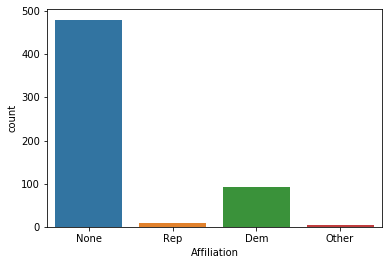

In [19]:
sns.countplot('Affiliation', data=poll_df)

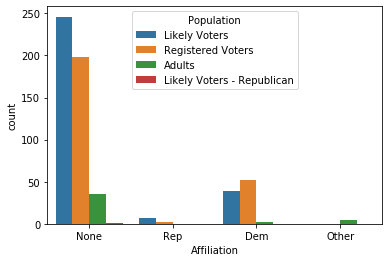

In [20]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

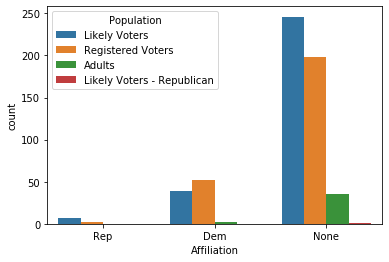

In [36]:
sns.countplot('Affiliation', data=poll_df, hue='Population', order=['Rep', 'Dem','None'])

In [37]:
avg = pd.DataFrame(poll_df.mean())

In [38]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [39]:
avg.drop('Number of Observations', axis=0, inplace=True)

In [40]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [41]:
avg.drop(['Question Text','Question Iteration', 'Other'], inplace=True)

In [43]:
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations', 'Other', 'Question Text', 'Question Iteration'], inplace=True)

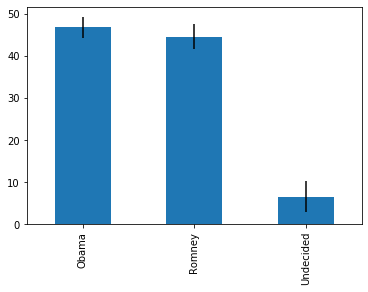

In [44]:
avg.plot(yerr=std, kind='bar', legend=False)

In [45]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'Std']

In [46]:
poll_avg

,Average,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
